In [3]:
import numpy as np


In [4]:
from typing import List
class Perceptron:
    def __init__(self,eta:float,n_iter:int, random_state:int, init_weight:bool,shuffle:bool, f_activate:str):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.init_weight = init_weight
        self.shuffle = shuffle
        self.f_activate = f_activate
        self.errors = []
        self.weights = None
    
    def _initialize_weights(self, num_features):
        if self.init_weight:
            if self.random_state is not None:
                np.random.seed(self.random_state)
            self.weights = np.random.normal(loc=0.0, scale=0.01, size=num_features + 1)
        else:
            self.weights = np.zeros(num_features + 1)

    def _activate(self, z):
        if self.f_activate == 'step':
            return np.where(z >= 0, 1, 0)
        elif self.f_activate == 'sign':
            return np.sign(z)

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        z = self.net_input(X)
        return self._activate(z)       
    
    def fit(self, X, y):
    
        if self.weights is None:
            num_features = X.shape[1]
            self._initialize_weights(num_features)
            
        if self.n_iter <= 0:  # Entrenar hasta que todos los ejemplos hayan sido aprendidos
            epoch = 0
            while True:
                if self.shuffle:
                    indices = np.random.permutation(len(y))
                    X, y = X[indices], y[indices]
                errors = 0
                for xi, t in zip(X, y):
                    update = self.eta * (t - self.predict(xi))
                    self.weights[1:] += update * xi
                    self.weights[0] += update
                    errors += int(update != 0)
                self.errors.append(errors)
                epoch += 1
                if errors == 0:
                    break
        else:  # Entrenar durante un número fijo de iteraciones
            for _ in range(self.n_iter):
                if self.shuffle:
                    indices = np.random.permutation(len(y))
                    X, y = X[indices], y[indices]
                errors = 0
                for xi, t in zip(X, y):
                    update = self.eta * (t - self.predict(xi))
                    self.weights[1:] += update * xi
                    self.weights[0] += update
                    errors += int(update != 0)
                self.errors.append(errors)

    
        
    

In [5]:
import os
import pandas as pd

In [6]:
df_train = pd.read_csv('mini_mnist_train.csv', header=None, encoding = 'utf-8')

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
data = df_train.iloc[:,:].values
filtered = (data[:, 0] == 8) | (data[:, 0] == 9)
data = data[filtered]
y = data[:,0]
print(y)
y = np.where(y == 8, 1, 0)
print(y)
X = data[:,1:]
print(X.shape)

[9 8 9 9 8 9 8 9 9 8 9 9 8 9 9 8 9 8 8]
[0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1]
(19, 784)


In [11]:
ppn =Perceptron(eta=0.5, n_iter=0, random_state=1, init_weight=True, shuffle=False, f_activate='step')

In [13]:
ppn.fit(X,y)

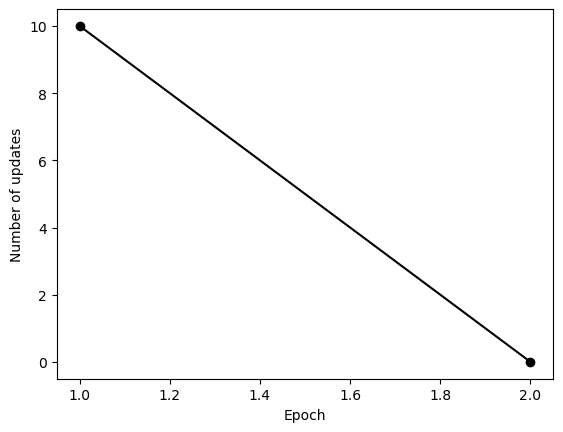

In [14]:
plt.plot(range(1,len(ppn.errors) + 1), ppn.errors, marker='o', color='black')
plt.xlabel('Epoch')
plt.ylabel('Number of updates')
plt.show()

In [223]:
y = df_train.iloc[0:100,0].values
y = np.where(y == 9, 1, -1)

In [224]:
ppn2 =Perceptron(eta=0.5, n_iter=1000, random_state=1, init_weight=False, shuffle=False, f_activate='step')

In [229]:
ppn2.fit(X,y)

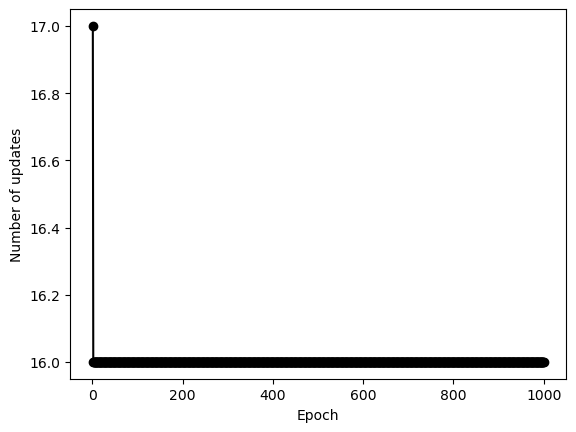

In [234]:
plt.plot(range(1,len(ppn.errors) + 1), ppn.errors, marker='o', label='Error', color='black',)
plt.xlabel('Epoch')
plt.ylabel('Number of updates')
plt.show()